In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
import os
import matplotlib.pyplot as plt

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD86 P4G4+TCPS+Smooth data
## 20x_CD86_all_surfaces_all_features

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8691188040912667
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.872597526057396
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8693070746155362


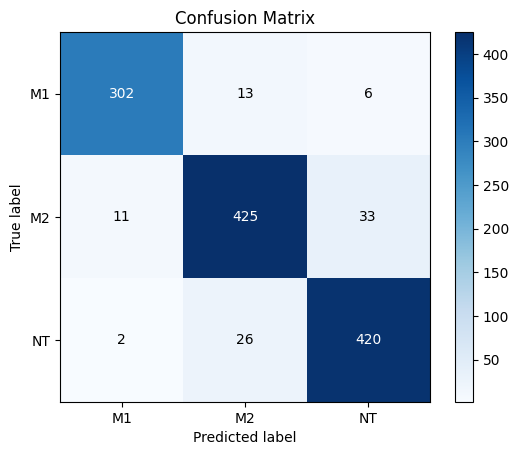

Calculate metrics for M1 and M2 only
____________________________________
 M1,   M2
[[302  13]
 [ 11 425]]
Accuracy (Correctly predicted M1+M2 / all predictions): 0.9680426098535286
Precision (Correctly predicted M1 / all cells predicted as M1): 0.9648562300319489
Sensitivity (Correctly predicted M1 / all actual M1): 0.9587301587301588
Specificity (Correctly predicted M2 / all actual M2): 0.9747706422018348
F1-score (How good the model performs in correctly identifying M1 and avoiding misclassifying M2): 0.961783439490446


In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True)
macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9964363001389469
AUC score for M2 0.979770476985313
AUC score for NT 0.9872344032549729
Average AUC 0.9878137267930777


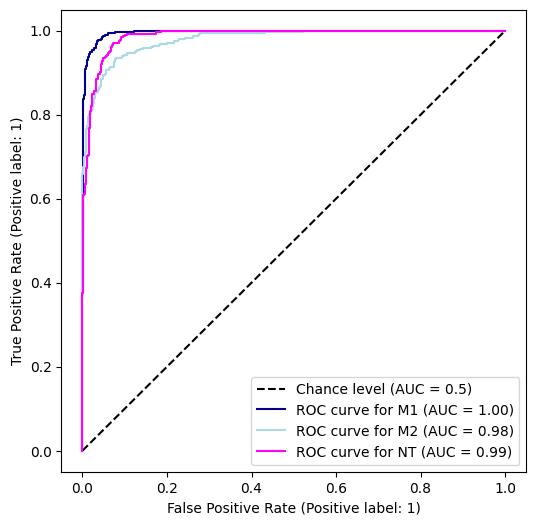

In [4]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

## Get the most important features

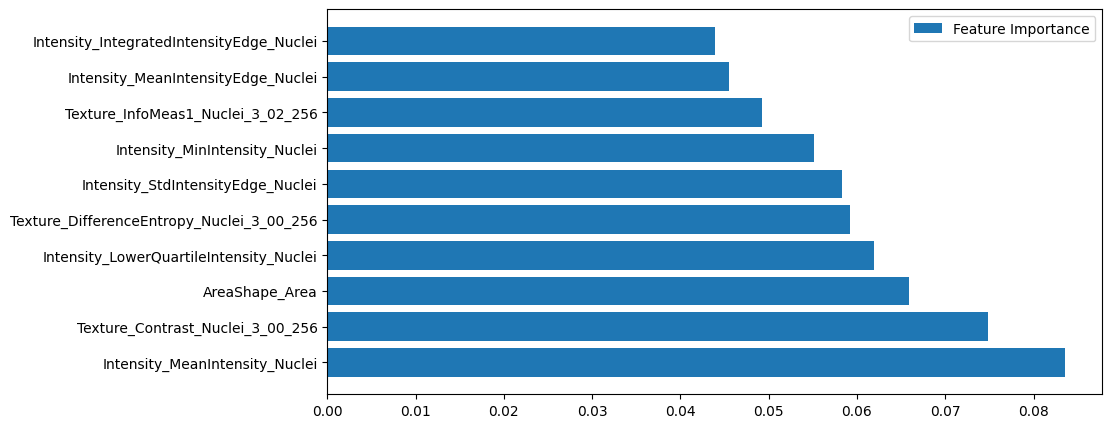

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_smooth['Feature'], important_features_smooth['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86 P4G4+TCPS+Smooth data without intestity features
## 20x_CD86_all_surfaces_shape_texture

In [6]:
nucleus_dataset_p4g4_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_intensity_data.csv')
all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4_no_intensity, nucleus_dataset_smooth_no_intensity, nucleus_dataset_tcps_no_intensity])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7140506163126147
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7196238390861551
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7147041604112014


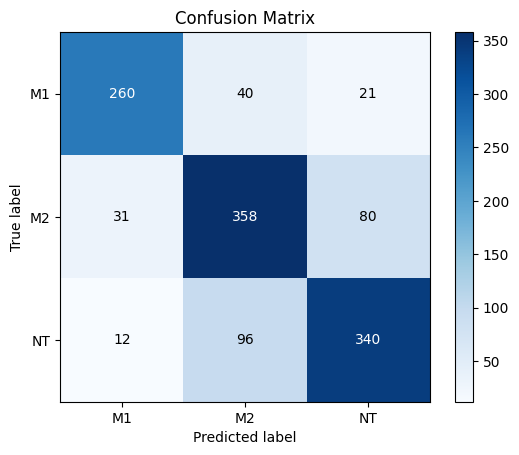

In [7]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9503562001243389
AUC score for M2 0.8869520131092633
AUC score for NT 0.9145965189873418
Average AUC 0.9173015774069814


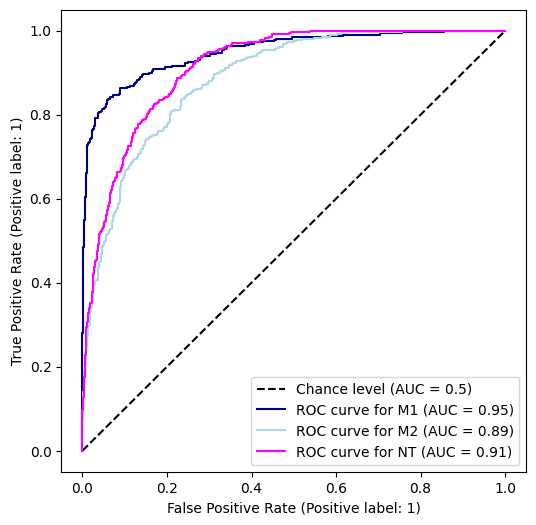

In [8]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

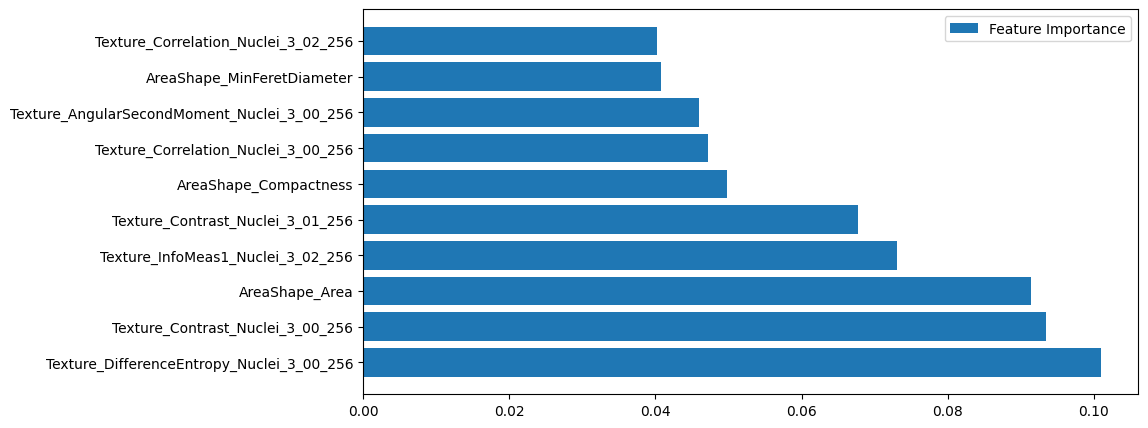

In [9]:
important_features = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86 P4G4+TCPS+Smooth data without shape features
## 20x_CD86_all_surfaces_texture_intensity

In [10]:
nucleus_dataset_p4g4_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_shape_data.csv')
all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4_no_shape, nucleus_dataset_smooth_no_shape, nucleus_dataset_tcps_no_shape])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8691384736428007
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8713979407034754
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8695078314849765


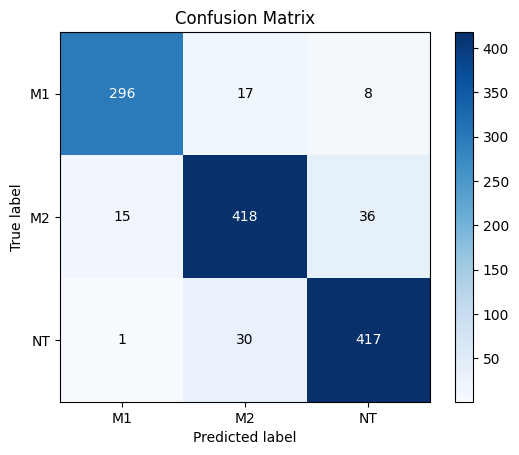

In [11]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9952608567148056
AUC score for M2 0.9766012959538181
AUC score for NT 0.9856945072332731
Average AUC 0.985852219967299


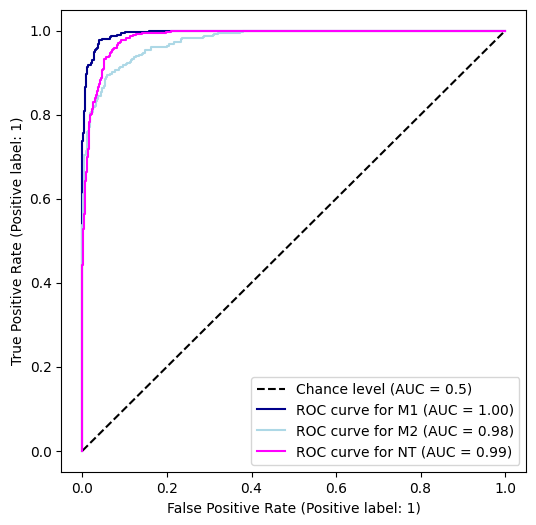

In [12]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

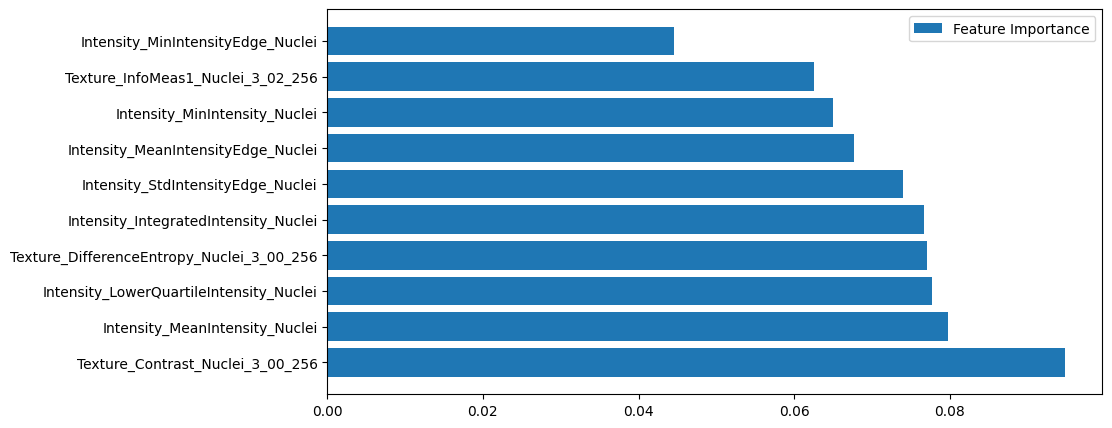

In [13]:
important_features = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86 P4G4+TCPS+Smooth data only shape features
## 20x_CD86_all_surfaces_shape

In [14]:
nucleus_dataset_p4g4_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Area')
nucleus_dataset_smooth_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Area')
nucleus_dataset_tcps_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Area')
all_surfaces_shape = pd.concat([nucleus_dataset_p4g4_shape, nucleus_dataset_smooth_shape, nucleus_dataset_tcps_shape])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.46607658012063985
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.4722048424152857
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.46496740720740065


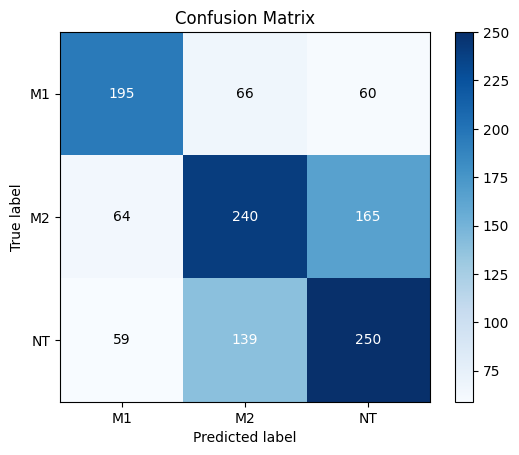

In [15]:
pipe_shape, test_data_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_shape, confusion_matrix=True)

AUC score for M1 0.8409754142079177
AUC score for M2 0.6992827059205182
AUC score for NT 0.7160770795660036
Average AUC 0.7521117332314798


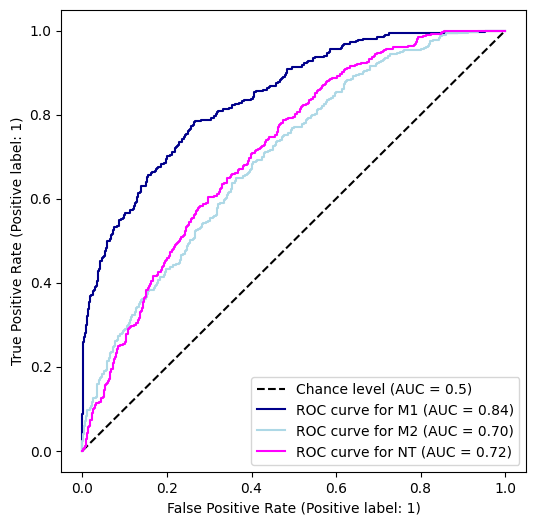

In [16]:
macrophages_analysis.make_multiclass_roc(pipe_shape, test_data_shape)

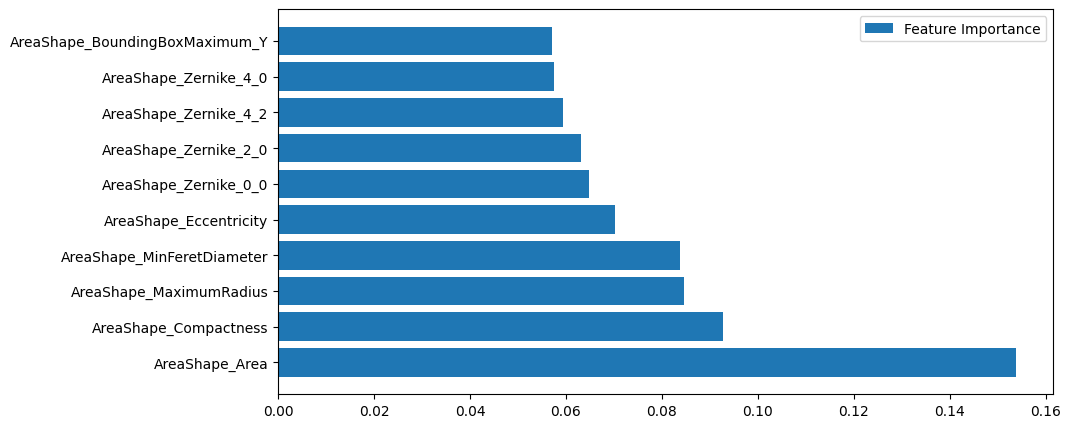

In [17]:
important_features = macrophages_analysis.get_best_features(pipe_shape, all_surfaces_shape.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86 P4G4+TCPS+Smooth data only texture features
## 20x_CD86_all_surfaces_texture

In [18]:
nucleus_dataset_p4g4_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Texture')
nucleus_dataset_smooth_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Texture')
nucleus_dataset_tcps_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Texture')
all_surfaces_texture = pd.concat([nucleus_dataset_p4g4_texture, nucleus_dataset_smooth_texture, nucleus_dataset_tcps_texture])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.6551140833988984
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.6547124355644263
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.6559301831814344


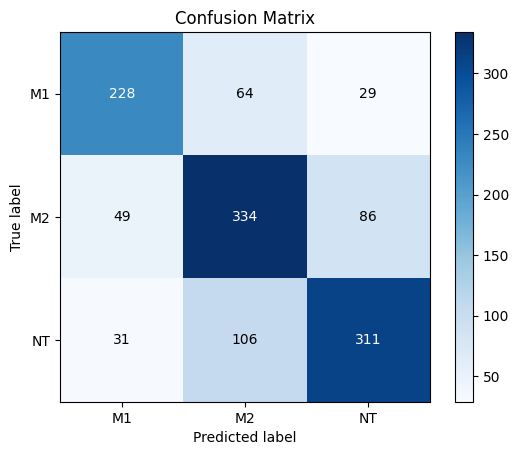

In [19]:
pipe_texture, test_data_texture = macrophages_analysis.make_nucleus_classifier(all_surfaces_texture, confusion_matrix=True)

AUC score for M1 0.8860363436235591
AUC score for M2 0.8364502954297802
AUC score for NT 0.8698999773960218
Average AUC 0.8641288721497871


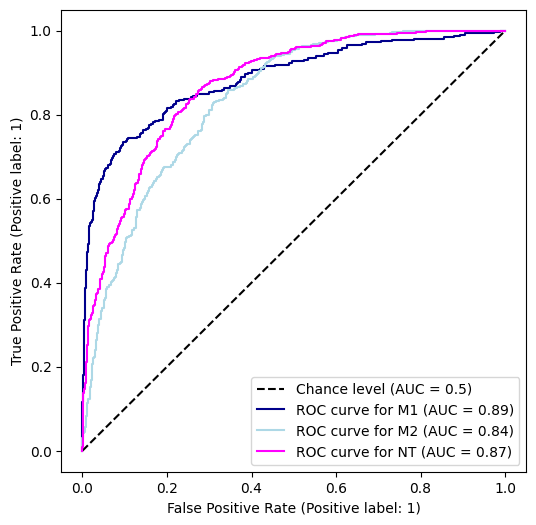

In [20]:
macrophages_analysis.make_multiclass_roc(pipe_texture, test_data_texture)

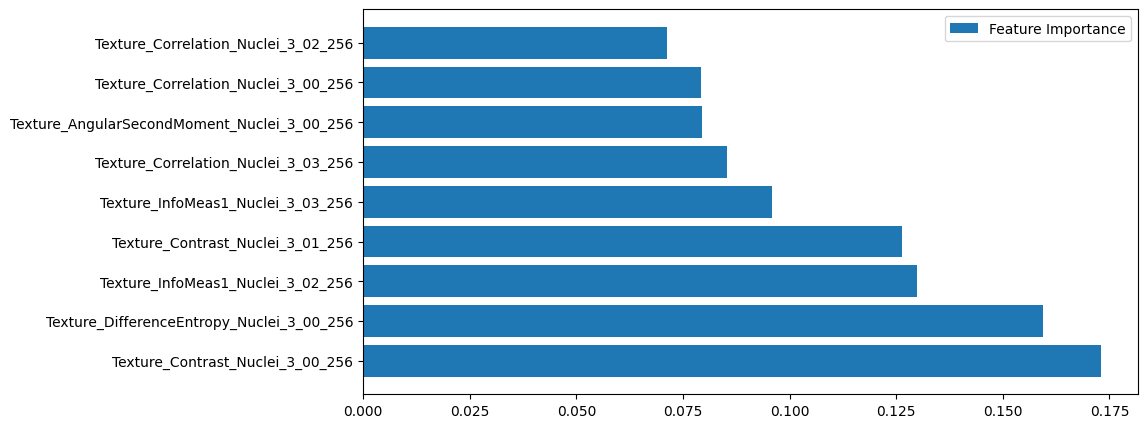

In [21]:
important_features = macrophages_analysis.get_best_features(pipe_texture, all_surfaces_texture.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86 P4G4+TCPS+Smooth data only intensity features
## 20x_CD86_all_surfaces_intensity

In [22]:
nucleus_dataset_p4g4_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Intensity')
nucleus_dataset_smooth_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Intensity')
nucleus_dataset_tcps_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Intensity')
all_surfaces_intensity = pd.concat([nucleus_dataset_p4g4_intensity, nucleus_dataset_smooth_intensity, nucleus_dataset_tcps_intensity])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8473773931287699
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8495158883277109
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8476943782216344


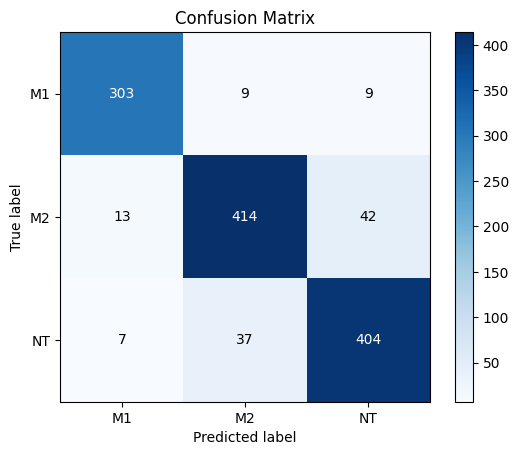

In [23]:
pipe_intensity, test_data_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_intensity, confusion_matrix=True)

AUC score for M1 0.9940650298786846
AUC score for M2 0.9734570691036735
AUC score for NT 0.9801424050632912
Average AUC 0.9825548346818831


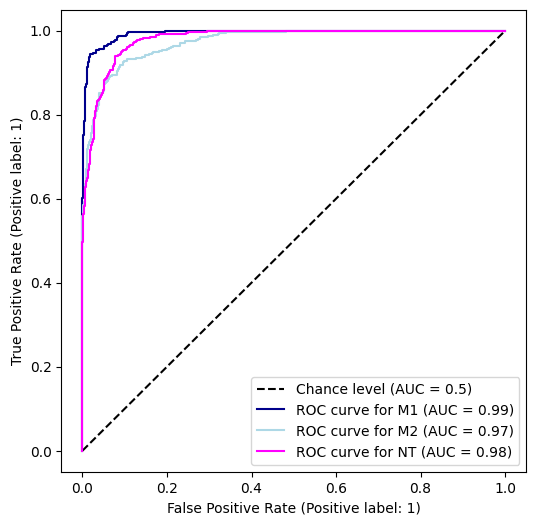

In [24]:
macrophages_analysis.make_multiclass_roc(pipe_intensity, test_data_intensity)

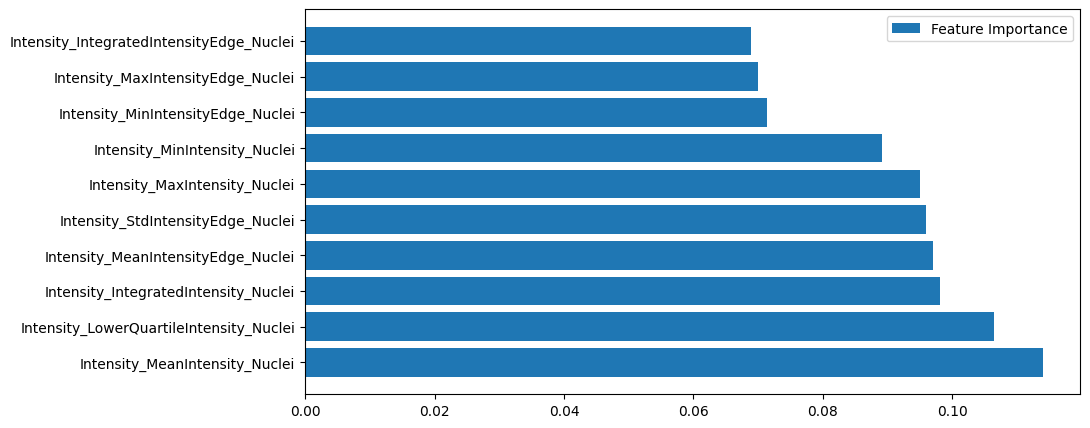

In [25]:
important_features = macrophages_analysis.get_best_features(pipe_intensity, all_surfaces_intensity.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()